# regression_JM3_DSFT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ThobaniMwandla/regression_JM3_DSFT/main/data/df-train_set.csv')
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [3]:
df.shape

(64376, 13)

The shape command shows us that we have **64376** rows of data and **13** features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


This command shows us that out of the **64376** rows none of the features contain any null values.

In [5]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

The above command also shows us the total number of null values appearing in each feature, which is zero for each feature in this case

In [6]:
df = df[df["Commodities"] == "APPLE GOLDEN DELICIOUS"]
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


We then now put our focus on only `APPLE GOLDEN DELICIOUS` as mentioned on the predict question

In [7]:
df.shape

(1952, 13)

In [8]:
df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


<IPython.core.display.Javascript object>


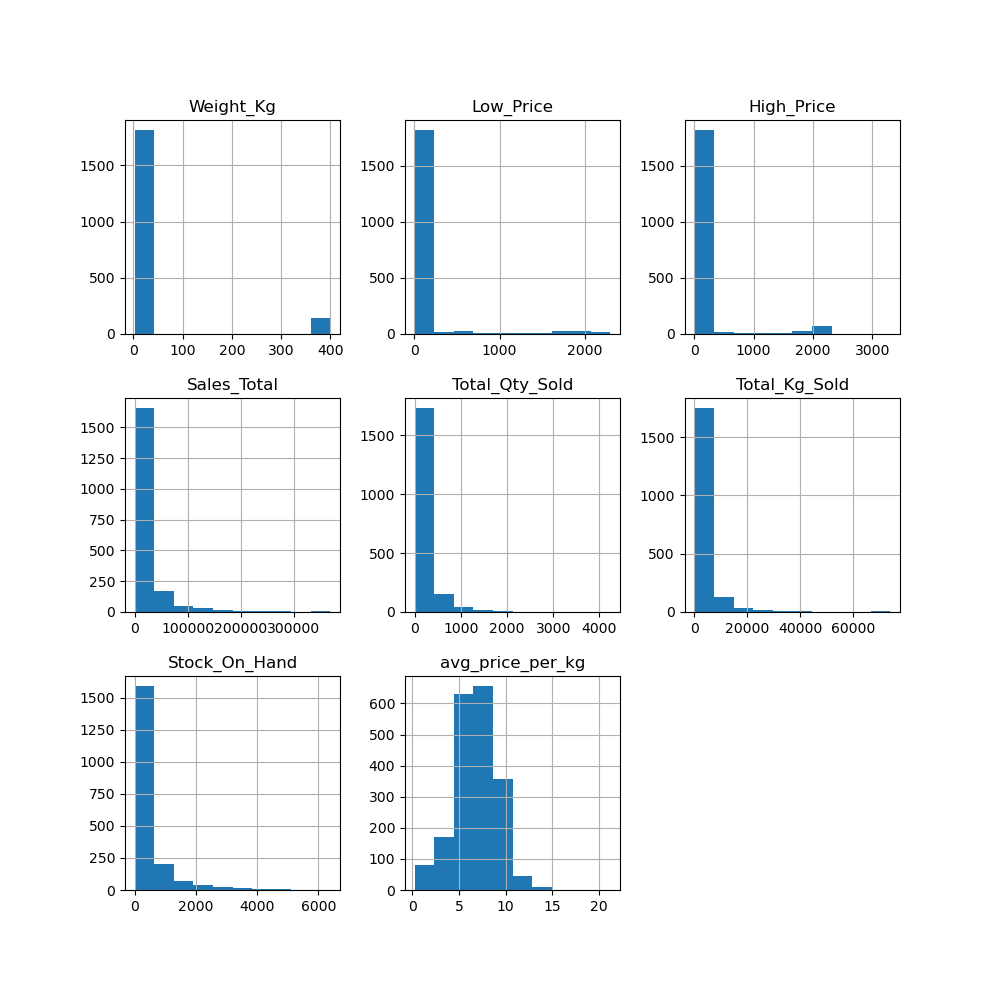

In [9]:
features = ['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand','avg_price_per_kg'] # a list of all numerical features
df[features].hist(figsize=(10,10));

<IPython.core.display.Javascript object>


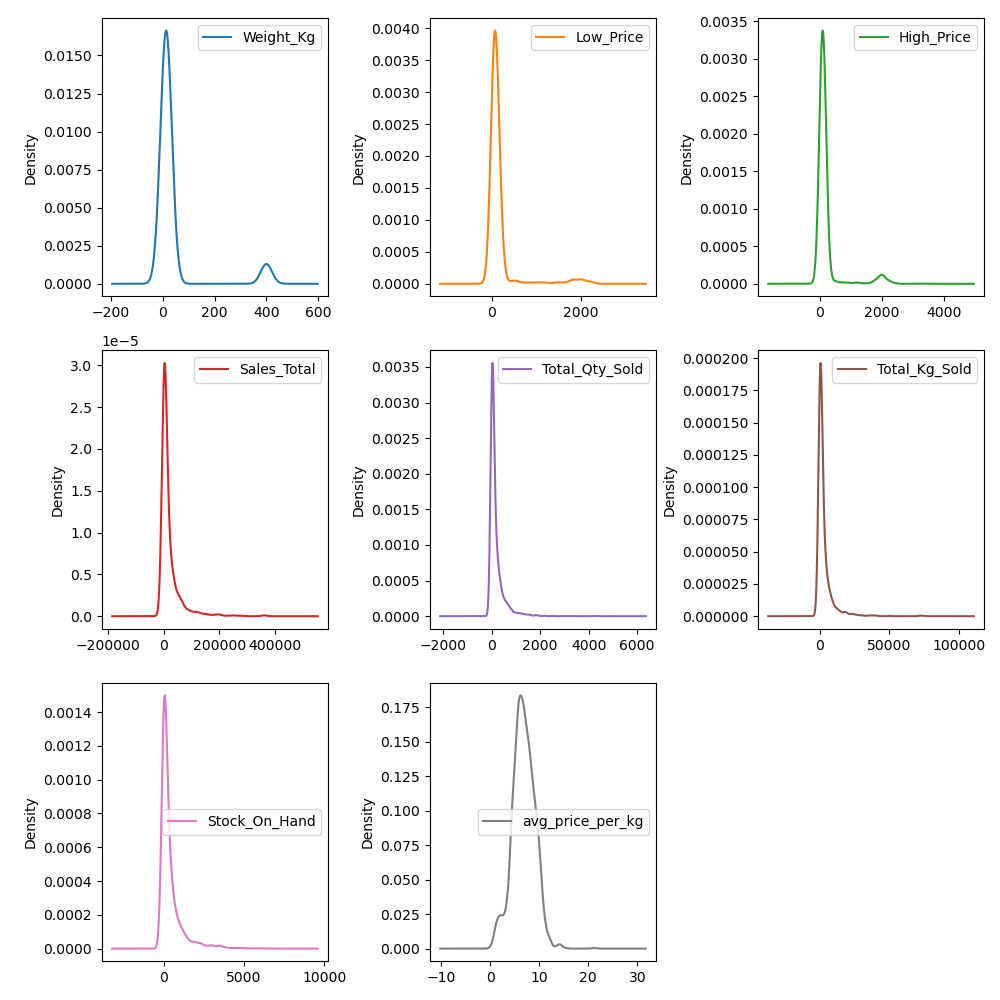

In [10]:
df[features].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 10))
plt.tight_layout();

#### Box Plot and Violin Plot

<IPython.core.display.Javascript object>


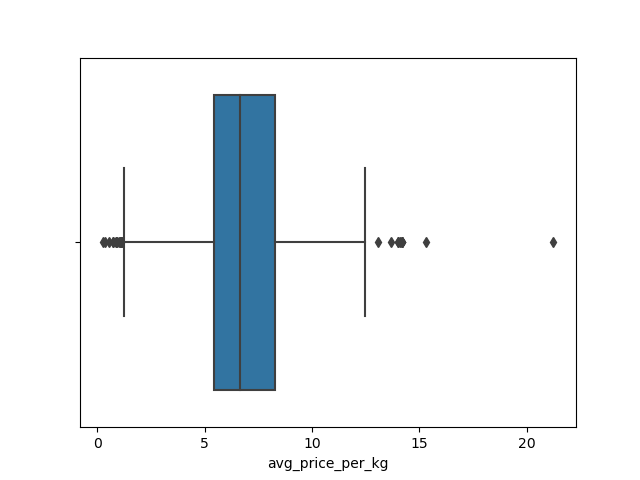

In [11]:
sns.boxplot(x='avg_price_per_kg', data=df);

From the above box plot, we clearly see they are some outliers on the `avg_price_per_kg` feature

#### Bar Plot

<IPython.core.display.Javascript object>


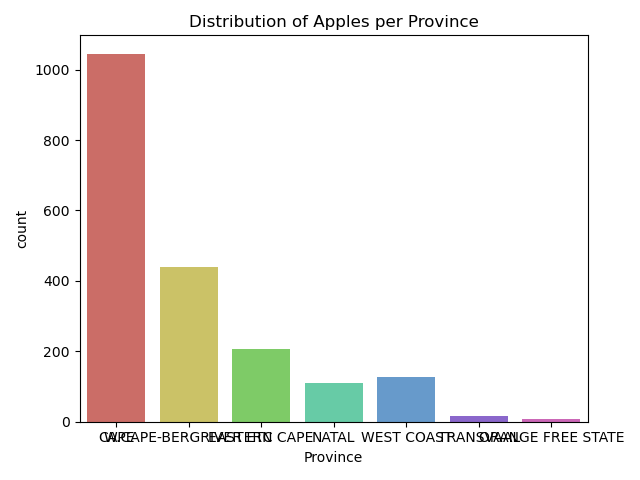

In [12]:
sns.countplot(x = 'Province', data = df, palette="hls")
plt.title("Distribution of Apples per Province")
plt.tight_layout();

#### Heatmap

<IPython.core.display.Javascript object>


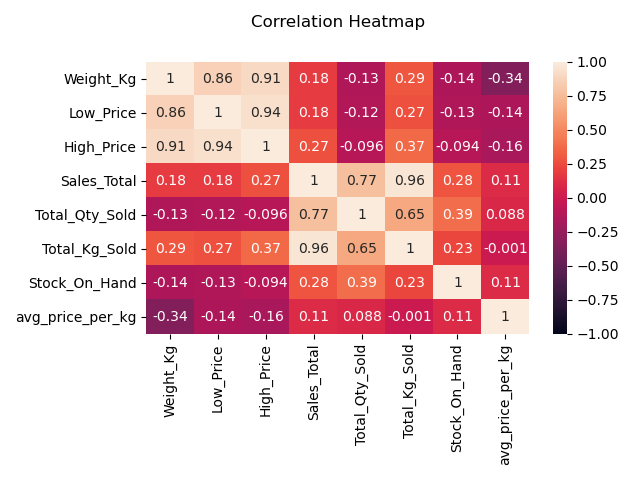

In [13]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=25)
plt.tight_layout();

#### Pair plot

<IPython.core.display.Javascript object>


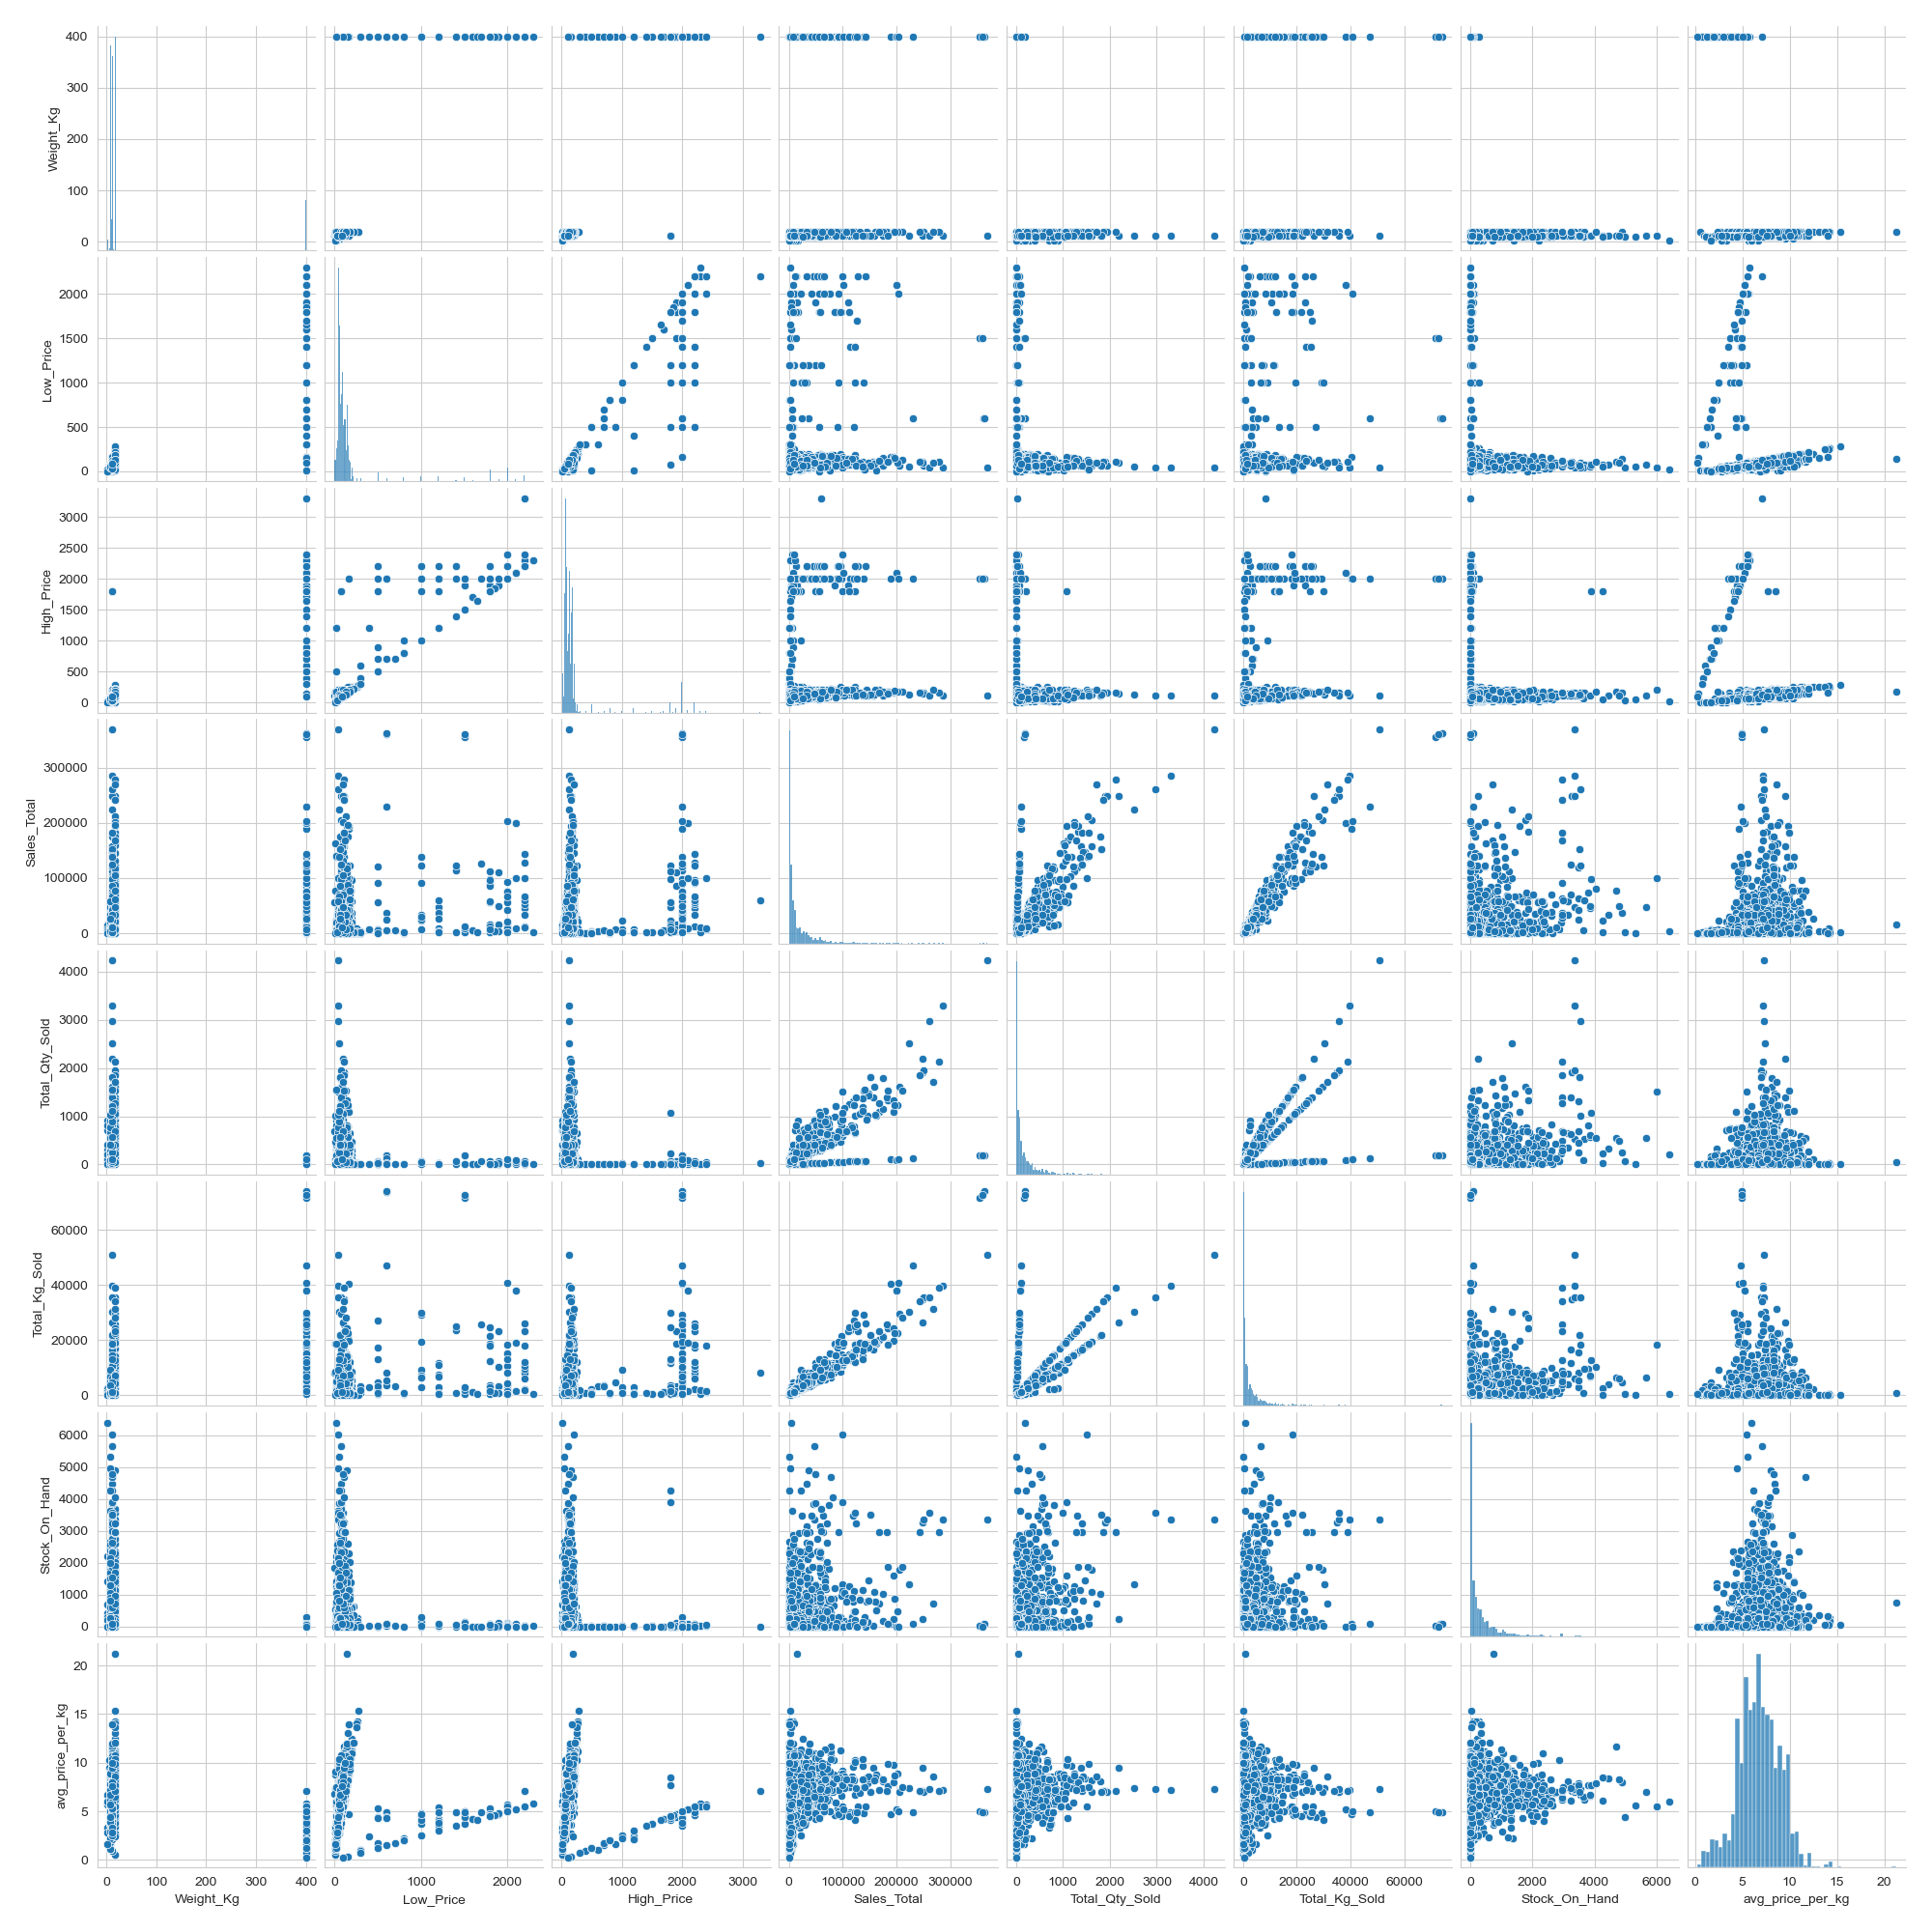

In [39]:
sns.set_style("whitegrid");
sns.pairplot(df);

## Linear Regression in Sklearn

#### Split the data

In [40]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [52]:
# Split the dataset into the response, y, and features, X
y = df['avg_price_per_kg']
X = df.drop(['Province', 'Container', 'Size_Grade', 'Commodities','Date', 'avg_price_per_kg'], axis=1)

calling the `train_test_split` function:

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#### Training the linear model

 loading the LinearRegression library.

In [54]:
from sklearn.linear_model import LinearRegression

 initializing the `LinearRegression()` object with all the default parameters.

In [55]:
lm = LinearRegression()

In [56]:
# Fitting the model to the training data 
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

assessing the fit of the line to the training data using `sklearn.metrics`.

In [61]:
from sklearn import metrics

In [62]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 3.149951596234793
R_squared: 0.37248503498501306


In [63]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

In [64]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 3.3631374695284517
R_squared: 0.34946838429271676
